In [12]:
import numpy as np
import vtk
from vtk.util import numpy_support as nps
import sys

import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd


In [13]:
base_path = 'AdvectionDiffusion/right/asi2/p1/RT1/'
f_name = 'int_r.dat'

Read in the int_r.dat file 

In [14]:
xs, ys = [], []
with open(base_path + f_name) as f: 
    for line in f: 
        a, b = line.split()
        xs.append(int(a))
        ys.append(float(b))

        

Text(0.5,1,'AdvectionDiffusion/right/asi2/p1/RT1/int_r.dat')

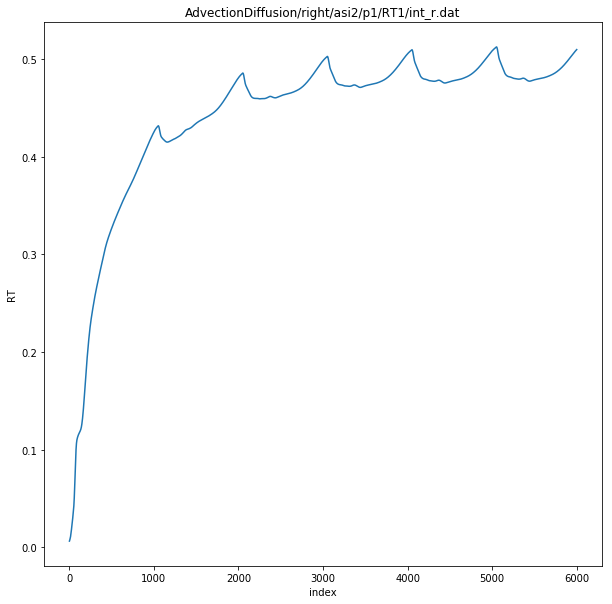

In [15]:
plt.figure(figsize=(10,10))

plt.plot(xs, ys)
plt.xlabel('index')
plt.ylabel('RT')
plt.title(base_path + f_name)

In [35]:
right_residence_times = {
    'ASI2': [.2214,  0.36337, 0.51839, 0.73986, 1.0446],
    'ASI4': [.49766, 0.79491, 1.1573, 1.5185, 2.3435],
    'ASI6': [.52155, 0.99527, 1.2981, 1.6884, 2.3579]
}

right_volumes = {
    'ASI2': [0.37912, 0.48379, 0.68129, 0.88389, 1.1165], 
    'ASI4': [0.90235, 1.3218, 1.9063, 2.5823, 2.8892],
    'ASI6': [1.4014, 1.4651, 2.109, 2.9514, 4.0107],
}

baseline_residence_times = {
    'ASI2': 0.06204,
    'ASI4': 0.086032,
    'ASI6': 0.11363,
}
baseline_volumes = {
    'ASI2': 0.24673,
    'ASI4': 0.56148,
    'ASI6': 0.25788
}

z_scores = ['p1', 'p2', 'p3', 'p4', 'p5']

plotted_z_scores = {
    'p1': 6,
    'p2': 8,
    'p3': 10,
    'p4': 12, 
    'p5': 14,
}
plotted_shapes = ['ASI2', 'ASI4', 'ASI6']

RT vs Shape Index, Prox RCA, stratified by Z-score

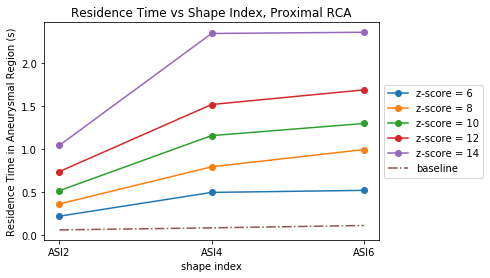

In [38]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for z, size in enumerate(z_scores):
    res_times = np.zeros((len(plotted_shapes), len(z_scores)))
    for a, shape in enumerate(plotted_shapes): 
        res_times[a, z] = right_residence_times[shape][z]
    ax.plot(plotted_shapes, res_times[:,z], label = 'z-score = ' + str(plotted_z_scores[size]), marker='o')
        
        
        
ax.plot(plotted_shapes, [baseline_residence_times[shape] for shape in plotted_shapes], label='baseline', linestyle='-.')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.legend()
plt.xlabel('shape index')
plt.ylabel('Residence Time in Aneurysmal Region (s)')
plt.title('Residence Time vs Shape Index, Proximal RCA')
plt.show()

Volume plot 

[0.37912, 0.48379, 0.68129, 0.88389, 1.1165, 0.90235, 1.3218, 1.9063, 2.5823, 2.8892, 1.4014, 1.4651, 2.109, 2.9514, 4.0107]


Text(0.5,1,'Residence Time vs Aneurysm Volume, Aggregated')

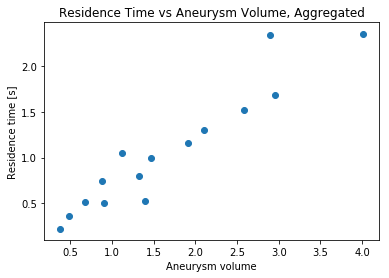

In [39]:
RTs = []
vols = []
for longform, data_dict in zip([RTs, vols], [right_residence_times, right_volumes]):
    for shape in plotted_shapes: 
        longform += data_dict[shape]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

print vols
ax.scatter(vols, RTs)
plt.xlabel('Aneurysm volume')
plt.ylabel('Residence time [s]')
plt.title('Residence Time vs Aneurysm Volume, Aggregated')